In [1]:
%matplotlib inline

from customtree import *
from customtreeplot import *

import os
import subprocess

from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import ticker

In [2]:
seed = 418

In [3]:
methods, method_names = zip(
    ("aldr.flat", "ALDR"),
    ("alias.c", "Alias"),
    ("aldr.flat.osrng", "ALDR (OsRng)"),
    ("alias.c.osrng", "Alias (OsRng)"),
)

In [4]:
data_file = "aldr-alias-performance-data.txt"
text_data = np.loadtxt(data_file, dtype=str)
data = []
for fname, method, preproc_time_cold, preproc_time_warm, sample_time, flips, num_bytes in text_data:
    preproc_time_cold = float(preproc_time_cold)
    preproc_time_warm = float(preproc_time_warm)
    sample_time = float(sample_time)
    flips = float(flips)
    num_bytes = int(num_bytes)
    data.append((fname, method, preproc_time_cold, preproc_time_warm, sample_time, flips, num_bytes))

In [5]:
def getn(f):
    return int(f.split('/')[-1].split('.')[1])

/tmp/ipykernel_1162412/3088623245.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_1162412/3088623245.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_1162412/3088623245.py:60: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_1162412/3088623245.py:85: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/tmp/ipykernel_1162412/3

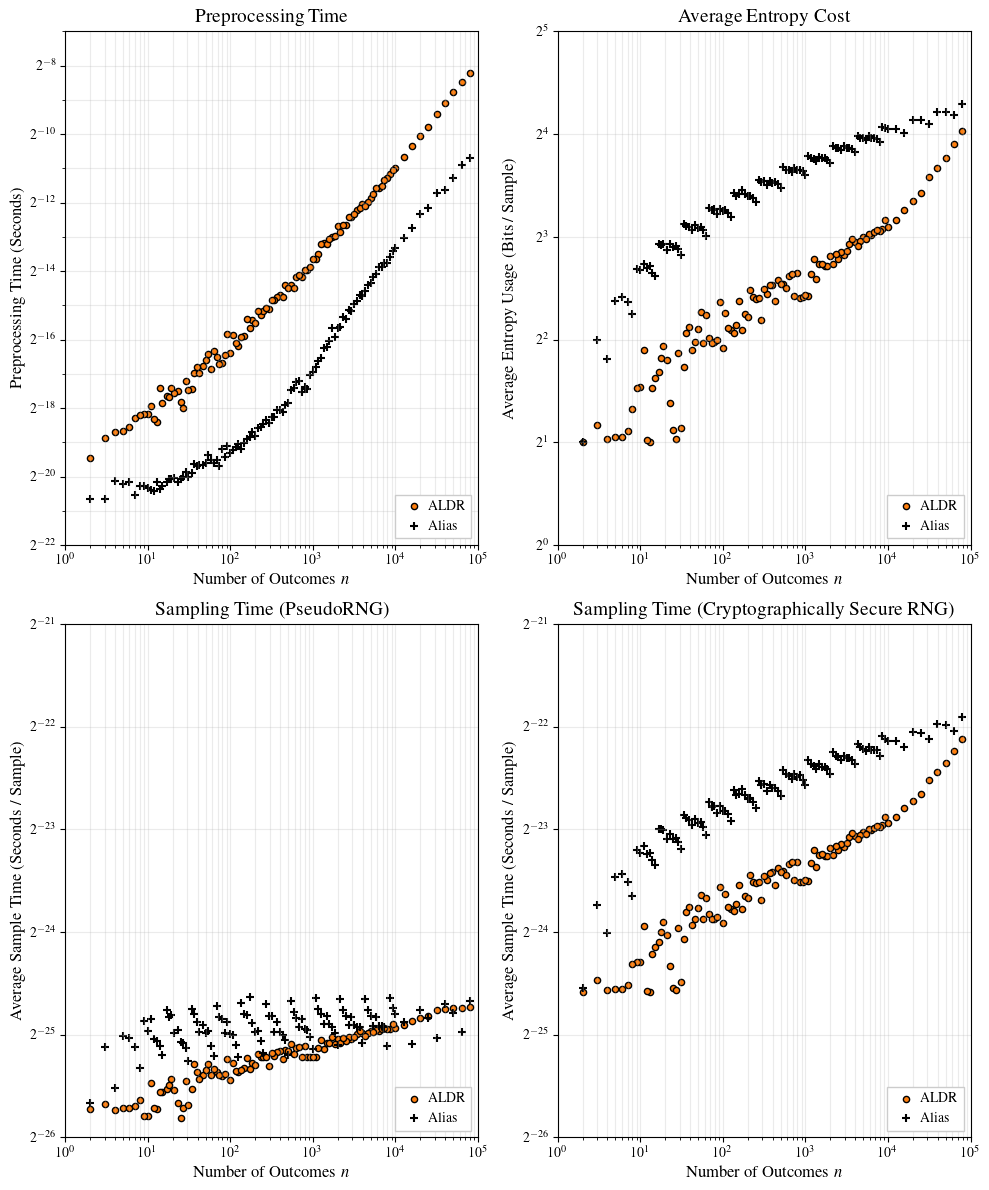

In [6]:
M = 100_000
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
C = [d for d in data if d[0].endswith(f'.{M}.{seed}.dist')]
styling = [
    {'facecolor': 'tab:orange', 'edgecolor':'k', 'marker':'o', 's':20},
    {'facecolor': 'k', 'edgecolor':'k', 'marker':'+', 's':40},
    ]
labels = {'aldr.flat': 'ALDR', 'alias.c': 'Alias', 'aldr.flat.osrng': 'ALDR (OsRNG)', 'alias.c.osrng': 'Alias (OsRNG)'}

# PLOT THE PREPROCESSING TIME.
ax = axes[0,0]
for i in range(len(methods[:2])):
    ax.scatter(
        *zip(*((getn(d[0]),d[2]) for d in C if d[1] == methods[i])),
        **styling[i])

ax.set_title('Preprocessing Time', fontsize=14)
ax.set_xlabel(r'Number of Outcomes $n$', fontsize=12)
ax.set_ylabel('Preprocessing Time (Seconds)', fontsize=12)

ax.set_yticklabels([])
ax.set_yscale('log', base=2)
ax.set_xscale('log', base=10)
ax.set_ylim([2**-22, 2**-7])
ax.set_xlim([10**0, 1*10**5])
ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, subs=[1], numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, subs=[1], numticks=100))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1], numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)*.1, numticks=100))

# PLOT THE ENTROPY COST.
ax = axes[0,1]
for i in range(len(methods[:2])):
    ax.scatter(
        *zip(*((getn(d[0]),d[5]) for d in C if d[1] == methods[i])),
        **styling[i])

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=10)
ax.set_ylim([2**0, 2**5])
ax.set_xlim([10**0, 1*10**5])

ax.set_title('Average Entropy Cost', fontsize=14)
ax.set_xlabel('Number of Outcomes $n$', fontsize=12)
ax.set_ylabel('Average Entropy Usage (Bits / Sample)', fontsize=12)

ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, subs=[1], numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, subs=[1], numticks=100))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1], numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)*.1, numticks=100))


# PLOT THE SAMPLING TIME (RAND).
ax = axes[1,0]
for i in range(len(methods[:2])):
    ax.scatter(
        *zip(*((getn(d[0]),d[4]) for d in C if d[1] == methods[i])),
        **styling[i])

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=10)
# ax.set_ylim([2**-27, 2**-24])
ax.set_ylim([2**-26, 2**-21])
ax.set_xlim([10**0, 1*10**5])

ax.set_title('Sampling Time (PseudoRNG)', fontsize=14,)
ax.set_xlabel('Number of Outcomes $n$', fontsize=12)
ax.set_ylabel('Average Sample Time (Seconds / Sample)', fontsize=12)

ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, subs=[1], numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, subs=[1], numticks=100))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1], numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)*.1, numticks=100))


# PLOT THE SAMPLING TIME (OsRNG).
ax = axes[1,1]
for i in range(len(methods[:2])):
    ax.scatter(
        *zip(*((getn(d[0]),d[4]) for d in C if d[1] == methods[i+2])),
        **styling[i])

ax.set_yscale('log', base=2)
ax.set_xscale('log', base=10)
ax.set_ylim([2**-26, 2**-21])
ax.set_xlim([10**0, 1*10**5])

ax.set_title('Sampling Time (Cryptographically Secure RNG)', fontsize=14)
ax.set_xlabel('Number of Outcomes $n$', fontsize=12)
ax.set_ylabel('Average Sample Time (Seconds / Sample)', fontsize=12)

ax.yaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_major_locator(ticker.LogLocator(base=2, subs=[1], numticks=10))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=2, subs=[1], numticks=100))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1], numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)*.1, numticks=100))


for ax in axes.flat:
    ax.scatter([],[],**styling[0],label=labels[methods[0]])
    ax.scatter([],[],**styling[1],label=labels[methods[1]])
    ax.legend(framealpha=1, fancybox=False, loc='lower right', handletextpad=0)
    ax.grid(alpha=0.25, which='both')

fig.set_tight_layout(True)
fig.align_ylabels(axes[:,1])

In [7]:
fig.savefig(os.path.join(output_dir, 'alias-aldr-compare.png'))